In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\기상청 기상자료개방포털\해양기상부이\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\기상청 기상자료개방포털\\해양기상부이\\OBS_BUOY_DD_20230112215040.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\기상청 기상자료개방포털\\해양기상부이\\풍도.csv']

In [4]:
df = pd.DataFrame()
for f in files:
    tmp_df = pd.read_csv(f,encoding='cp949')
    df = pd.concat([df,tmp_df])
df.head()

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,21229,2018-01-01,9.5,1022.1,52.0,5.0,13.0,4.9,3.0,3.5,6.4,8.5,9.1
1,21229,2018-01-02,10.0,1022.7,47.0,5.9,13.0,4.7,2.8,4.0,6.6,8.4,9.1
2,21229,2018-01-03,6.5,1025.6,65.0,2.7,12.7,4.5,2.8,3.7,6.3,9.1,12.8
3,21229,2018-01-04,6.2,1024.4,63.0,3.5,12.5,4.2,2.6,3.7,5.8,9.8,10.7
4,21229,2018-01-05,3.6,1017.1,63.0,5.1,12.4,2.1,1.3,2.1,3.6,8.0,9.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37860 entries, 0 to 488
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지점           37860 non-null  int64  
 1   일시           37860 non-null  object 
 2   평균 풍속(m/s)   36945 non-null  float64
 3   평균기압(hPa)    37015 non-null  float64
 4   평균 상대습도(%)   36546 non-null  float64
 5   평균 기온(°C)    36955 non-null  float64
 6   평균 수온(°C)    37104 non-null  float64
 7   평균 최대 파고(m)  37275 non-null  float64
 8   평균 유의 파고(m)  37024 non-null  float64
 9   최고 유의 파고(m)  37773 non-null  float64
 10  최고 최대 파고(m)  37779 non-null  float64
 11  평균 파주기(sec)  36839 non-null  float64
 12  최고 파주기(sec)  37745 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 4.0+ MB


In [6]:
df.describe()

,지점,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
count,37860.000000,36945.000000,37015.000000,36546.000000,36955.000000,37104.00000,37275.000000,37024.000000,37773.000000,37779.000000,36839.000000,37745.000000
mean,22124.523085,5.899851,1016.316096,74.657911,15.309014,17.36374,1.709105,1.049870,1.497702,2.536891,5.603282,7.326441
std,211.290089,2.735863,8.031406,14.495245,7.669414,6.04467,1.172563,0.736554,1.055073,1.732427,1.609851,2.544747
min,21229.000000,0.000000,943.900000,0.000000,-18.400000,0.00000,0.100000,0.000000,0.000000,0.100000,2.300000,2.600000
25%,22105.000000,3.800000,1010.000000,63.000000,9.200000,13.20000,0.900000,0.500000,0.800000,1.300000,4.400000,5.800000
50%,22184.000000,5.500000,1016.600000,76.000000,15.600000,17.30000,1.400000,0.900000,1.300000,2.100000,5.500000,7.100000
75%,22189.000000,7.600000,1022.500000,87.000000,21.700000,22.20000,2.200000,1.400000,2.000000,3.300000,6.500000,8.000000
max,22303.000000,21.200000,1041.600000,100.000000,32.400000,30.70000,12.700000,8.400000,12.100000,17.700000,26.600000,64.000000


In [7]:
df.describe(include=np.object)

,일시
count,37860
unique,1826
top,2022-08-05
freq,26


****

In [8]:
df.isnull().sum()

지점                0
일시                0
평균 풍속(m/s)      915
평균기압(hPa)       845
평균 상대습도(%)     1314
평균 기온(°C)       905
평균 수온(°C)       756
평균 최대 파고(m)     585
평균 유의 파고(m)     836
최고 유의 파고(m)      87
최고 최대 파고(m)      81
평균 파주기(sec)    1021
최고 파주기(sec)     115
dtype: int64

**지점별 평균 풍속, 평균기압, 평균 상대습도, 평균 기온, 평균 수온은?**

**각 년도의 월별 평균 풍속, 평균기압, 평균 상대습도, 평균 기온, 평균 수온, 평균 최대 파고, 평균 유의 파고, 평균 파주기는?**

**각 칼럼의 상관관계는?**

## 전처리

In [9]:
df['평균 기온(°C)'].fillna(-273,inplace=True)
df.fillna(-1,inplace=True)

In [10]:
def convert_year(x):
    return datetime.strptime(x,'%Y-%m-%d').year

def convert_month(x):
    return datetime.strptime(x,'%Y-%m-%d').month

def convert_day(x):
    return datetime.strptime(x,'%Y-%m-%d').day

df['년도'] = df['일시'].apply(convert_year)
df['월'] = df['일시'].apply(convert_month)
df['일'] = df['일시'].apply(convert_day)

In [11]:
def convert_area(x):
    if x==22297:
        return '가거도'
    elif x==22193:
        return '가거도'
    elif x==22103:
        return '거문도'
    elif x==22104:
        return '거제도'
    elif x==22300:
        return '남해239'
    elif x==22301:
        return '남해465'
    elif x==22101:
        return '덕적도'
    elif x==22105:
        return '동해'
    elif x==22302:
        return '동해78'
    elif x==22107:
        return '마라도'
    elif x==22186:
        return '부안'
    elif x==22187:
        return '서귀포'
    elif x==22191:
        return '서해170'
    elif x==22299:
        return '서해190'
    elif x==22192:
        return '서해206'
    elif x==22183:
        return '신안'
    elif x==22108:
        return '외연도'
    elif x==21229:
        return '울릉도'
    elif x==22189:
        return '울산'
    elif x==22190:
        return '울진'
    elif x==22185:
        return '인천'
    elif x==22184:
        return '추자도'
    elif x==22102:
        return '칠발도'
    elif x==22188:
        return '통영'
    elif x==22106:
        return '포항'
    elif x==22303:
        return '풍도'
    else:
        return '홍도'

df['지점'] = df['지점'].apply(convert_area)

## 시각화

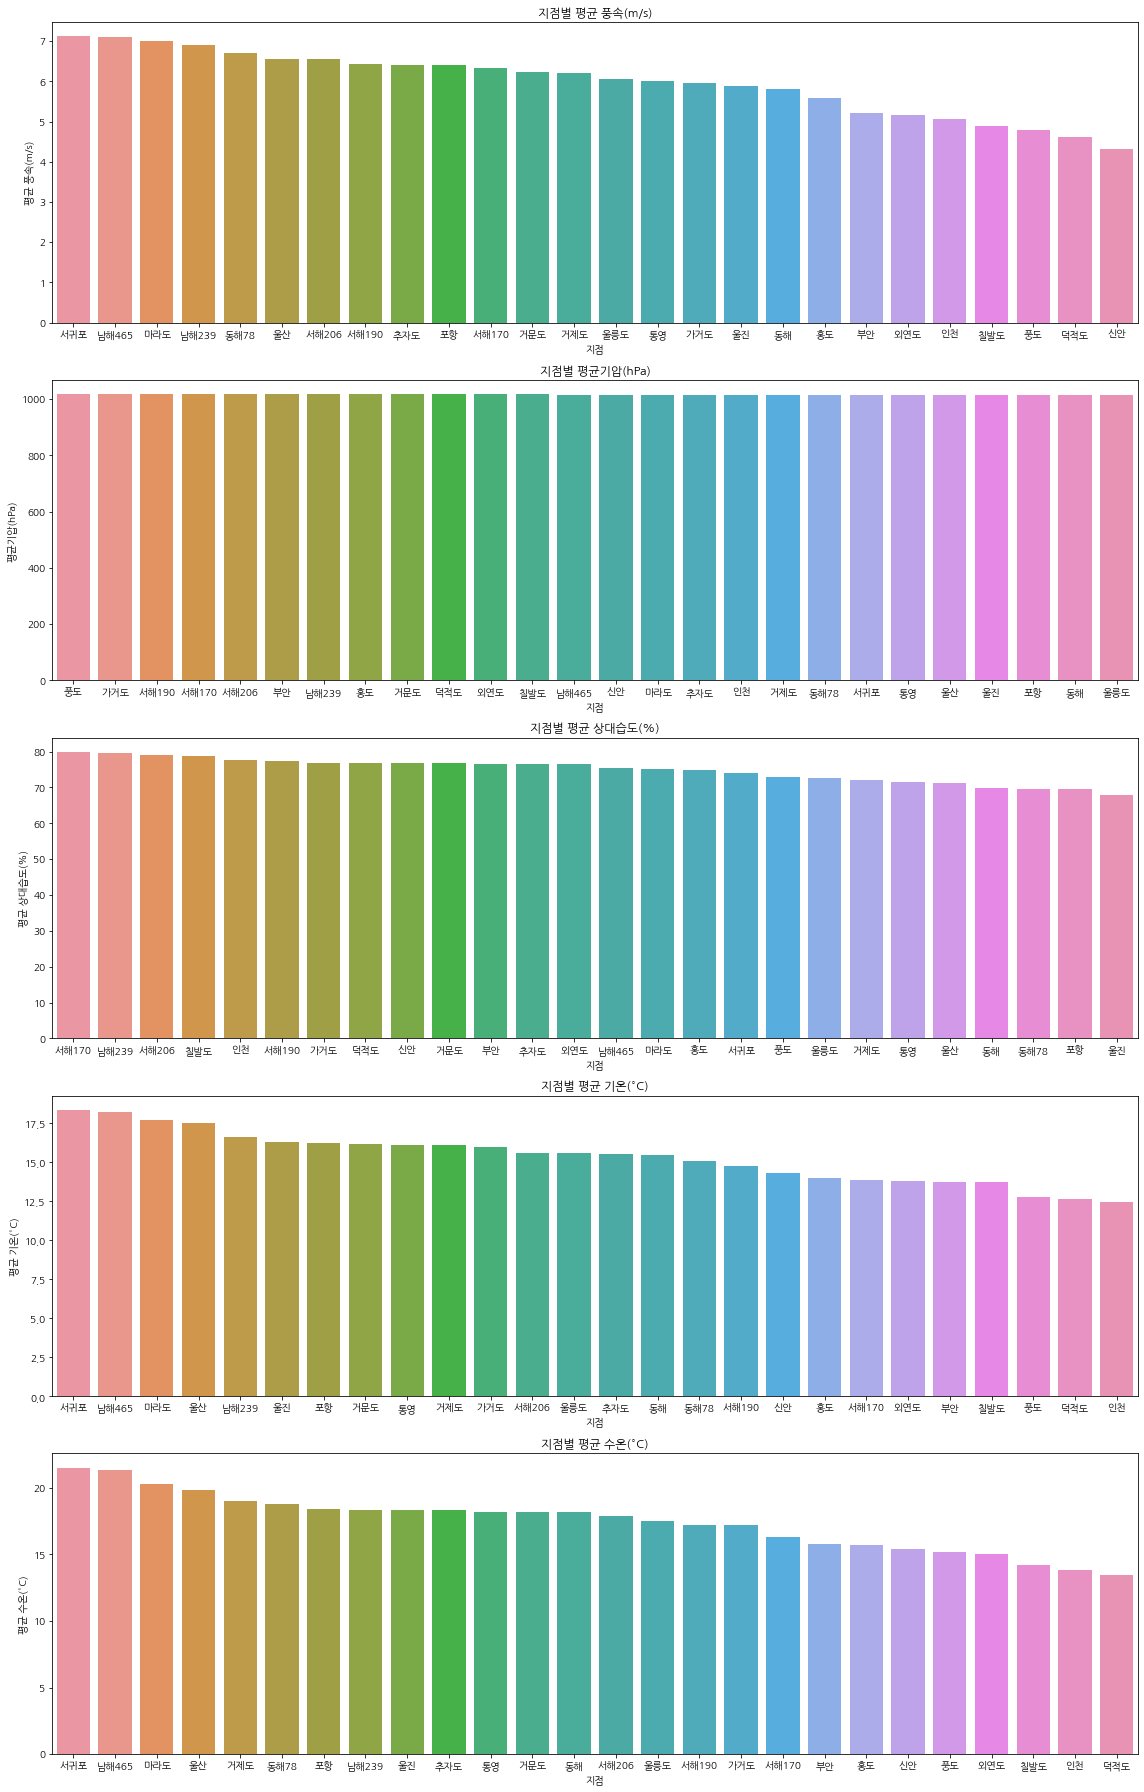

In [29]:
fig,axes = plt.subplots(5,1,figsize=(16,25))
cols = ['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)']
for i,c in enumerate(cols):
    if c=='평균 기온(°C)':
        limit = -273
    else:
        limit = -1
    sub_df = df[df[c]>limit].groupby(['지점'],as_index=False)[c].mean().sort_values(c,ascending=False)
    sns.barplot(data=sub_df,x='지점',y=c,ax=axes[i]).set(title=f'지점별 {c}')
plt.tight_layout()

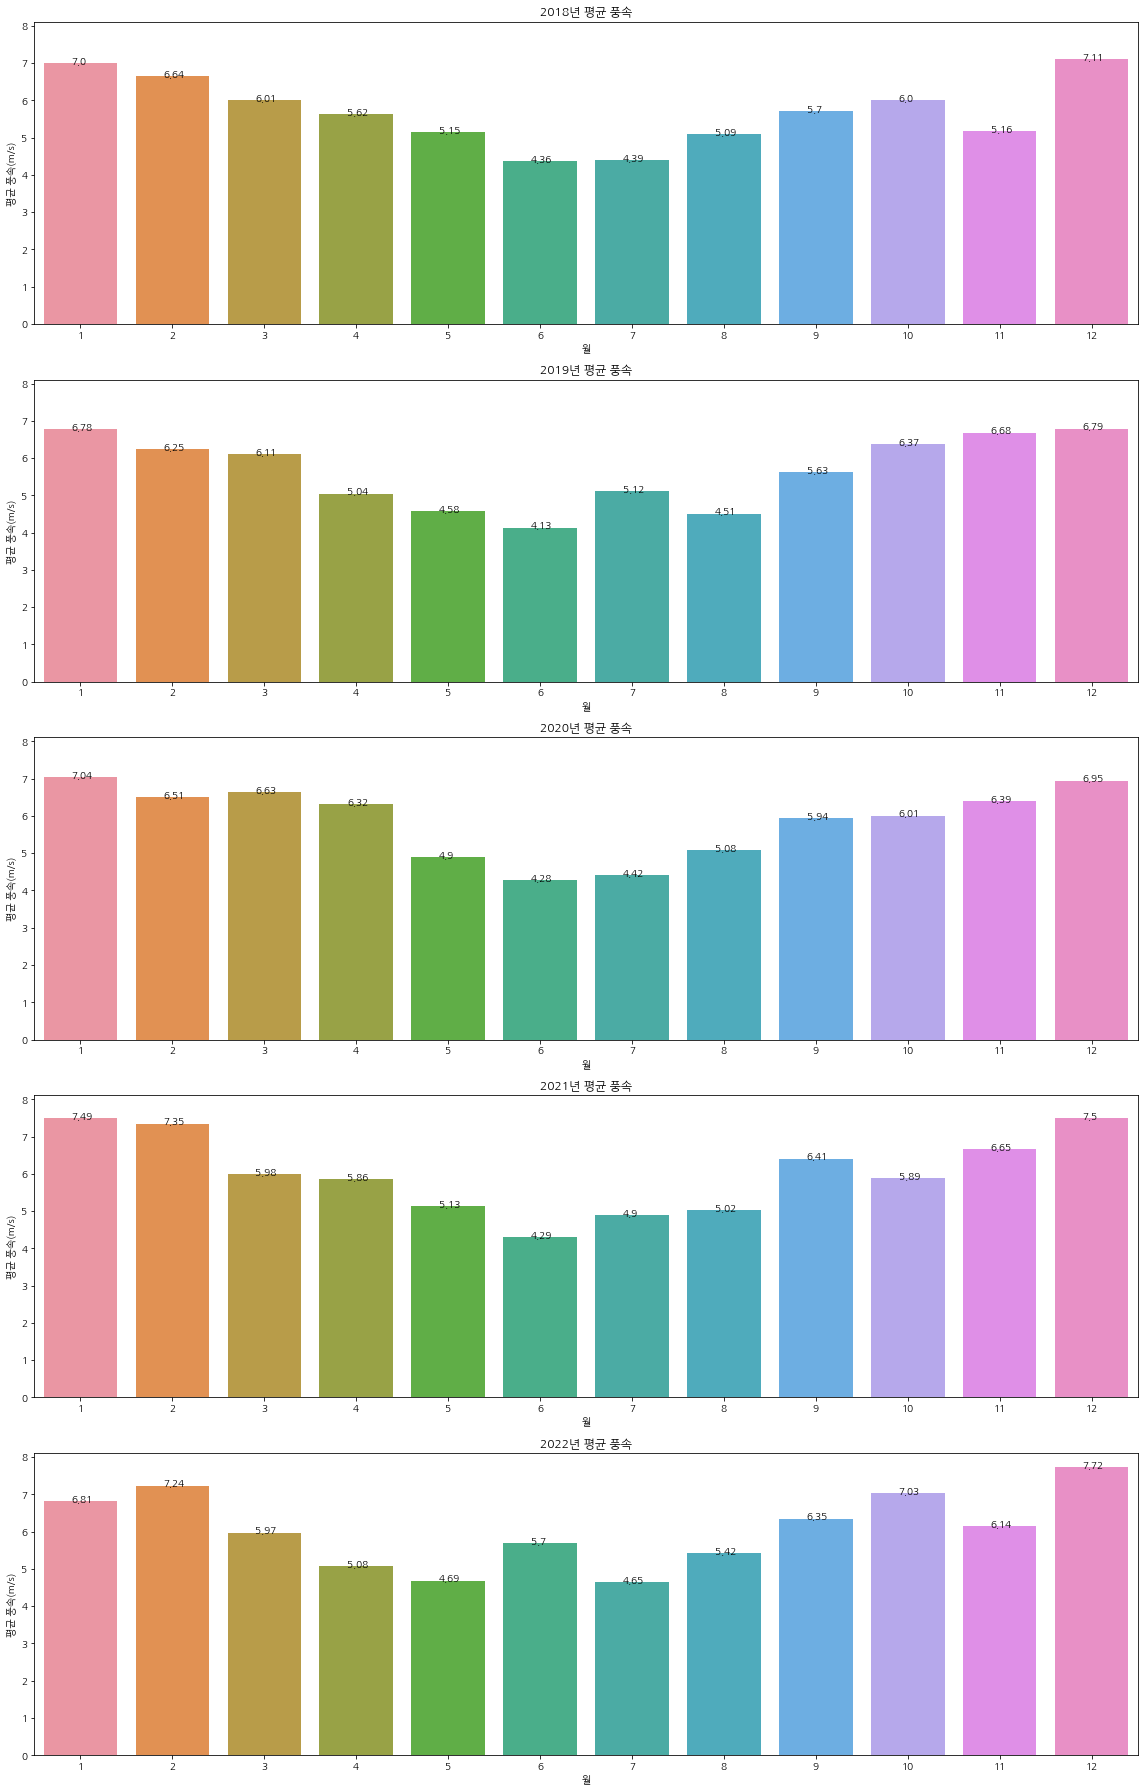

In [30]:
sub_df = df[df['평균 풍속(m/s)']>-1].groupby(['년도','월'],as_index=False)['평균 풍속(m/s)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 풍속(m/s)',ax=axes[i]).set(title=f'{y}년 평균 풍속')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 풍속(m/s)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

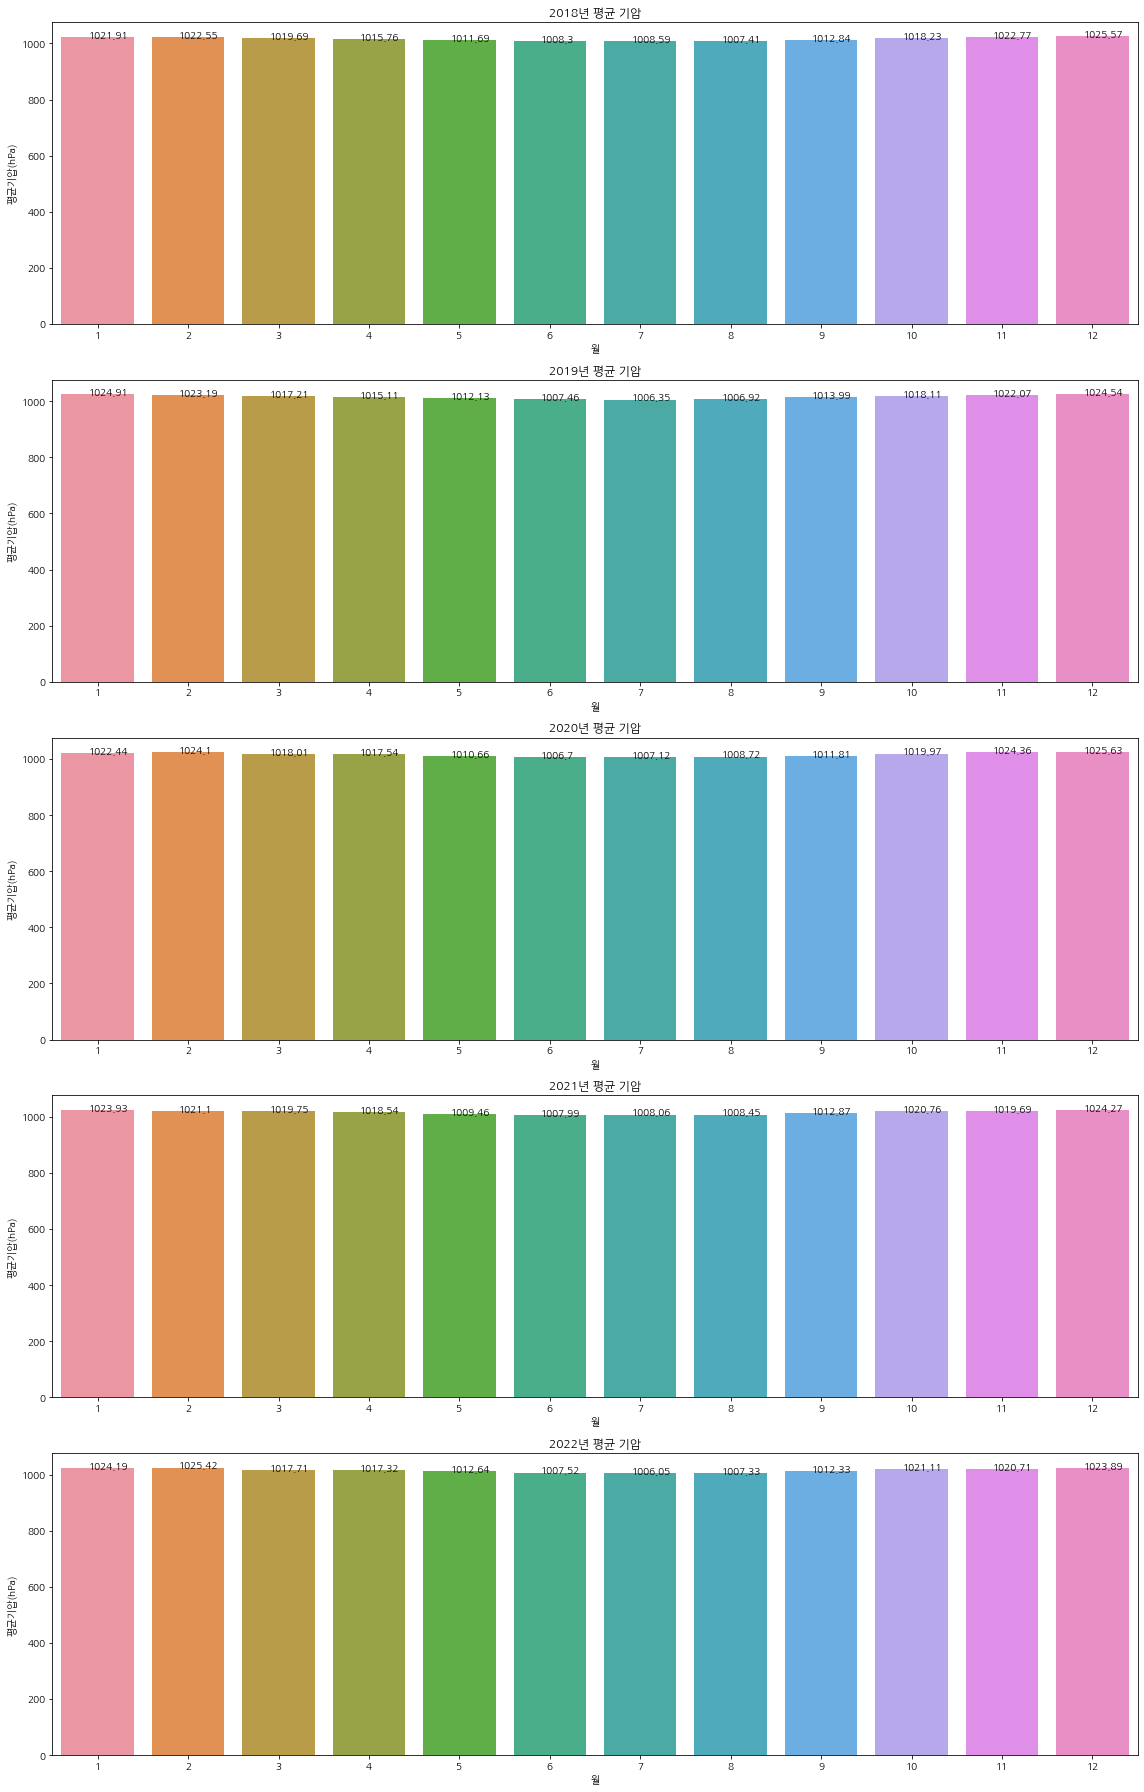

In [31]:
sub_df = df[df['평균기압(hPa)']>-1].groupby(['년도','월'],as_index=False)['평균기압(hPa)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균기압(hPa)',ax=axes[i]).set(title=f'{y}년 평균 기압')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균기압(hPa)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

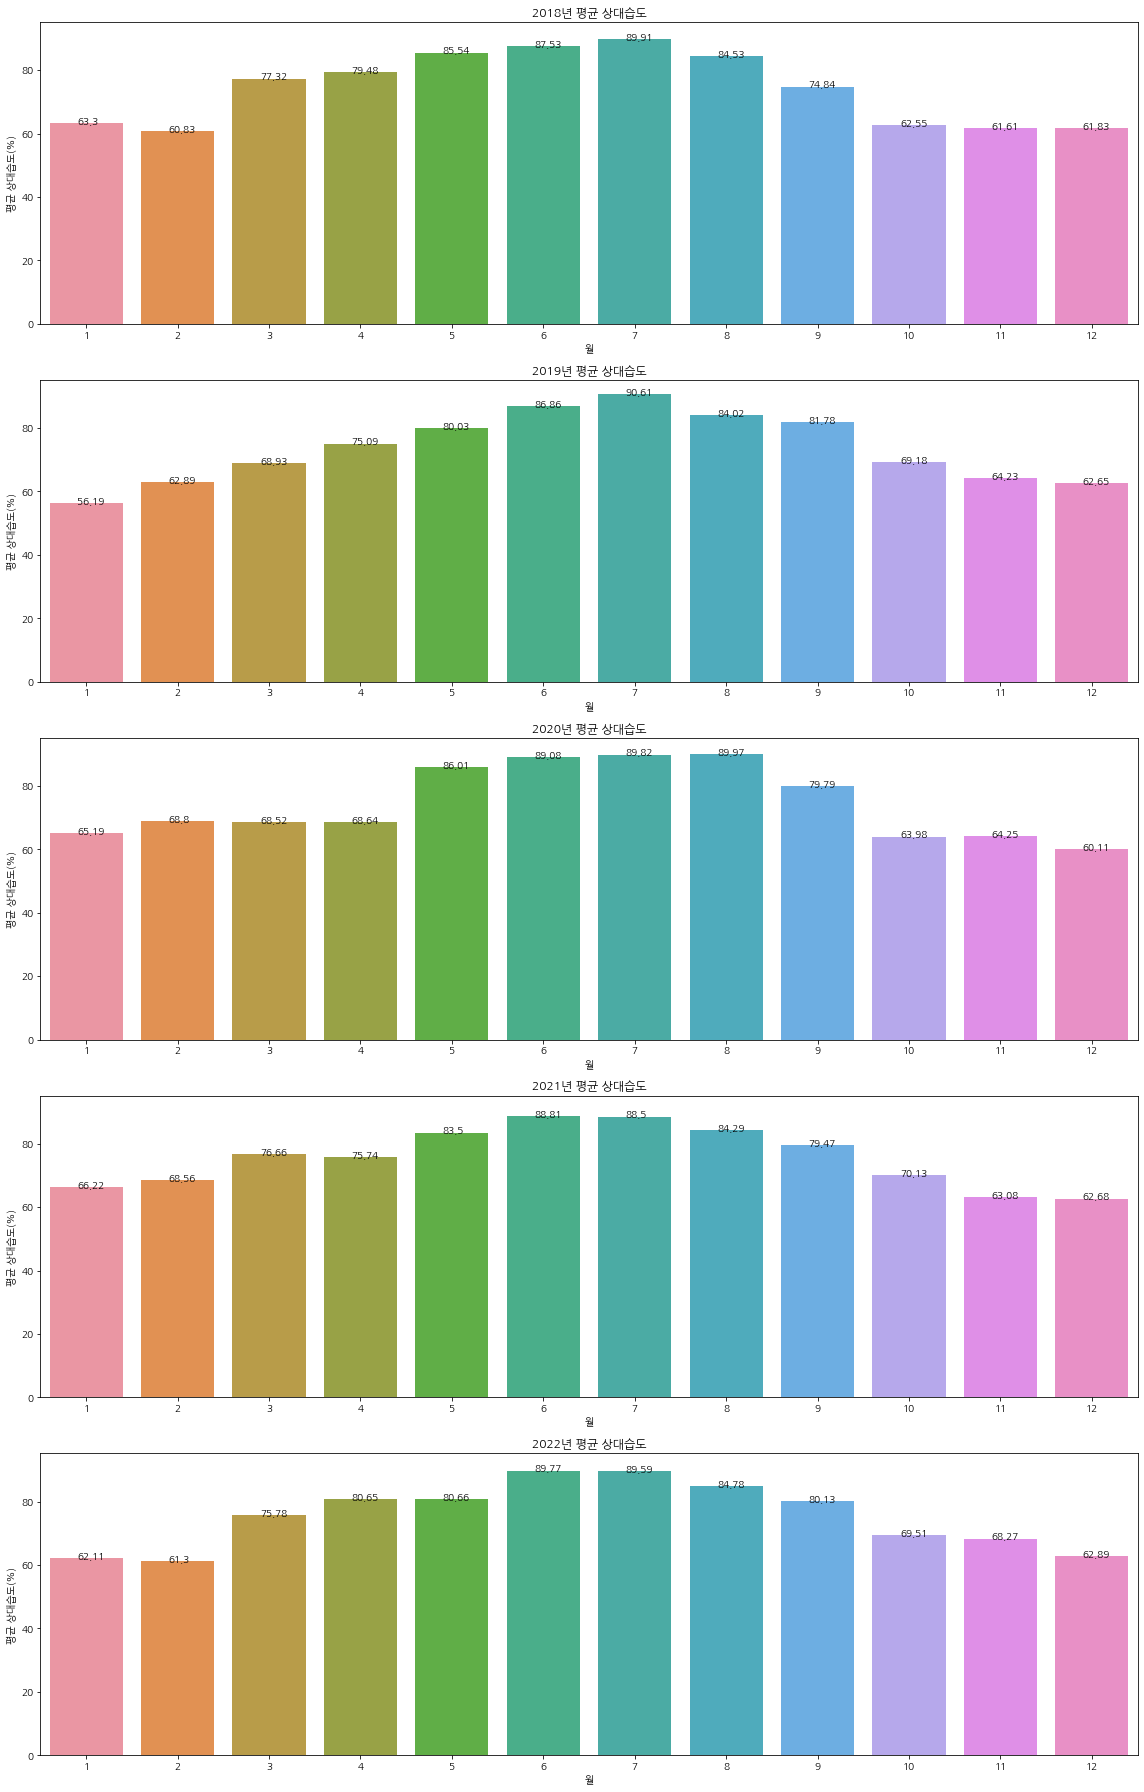

In [32]:
sub_df = df[df['평균 상대습도(%)']>-1].groupby(['년도','월'],as_index=False)['평균 상대습도(%)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 상대습도(%)',ax=axes[i]).set(title=f'{y}년 평균 상대습도')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 상대습도(%)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

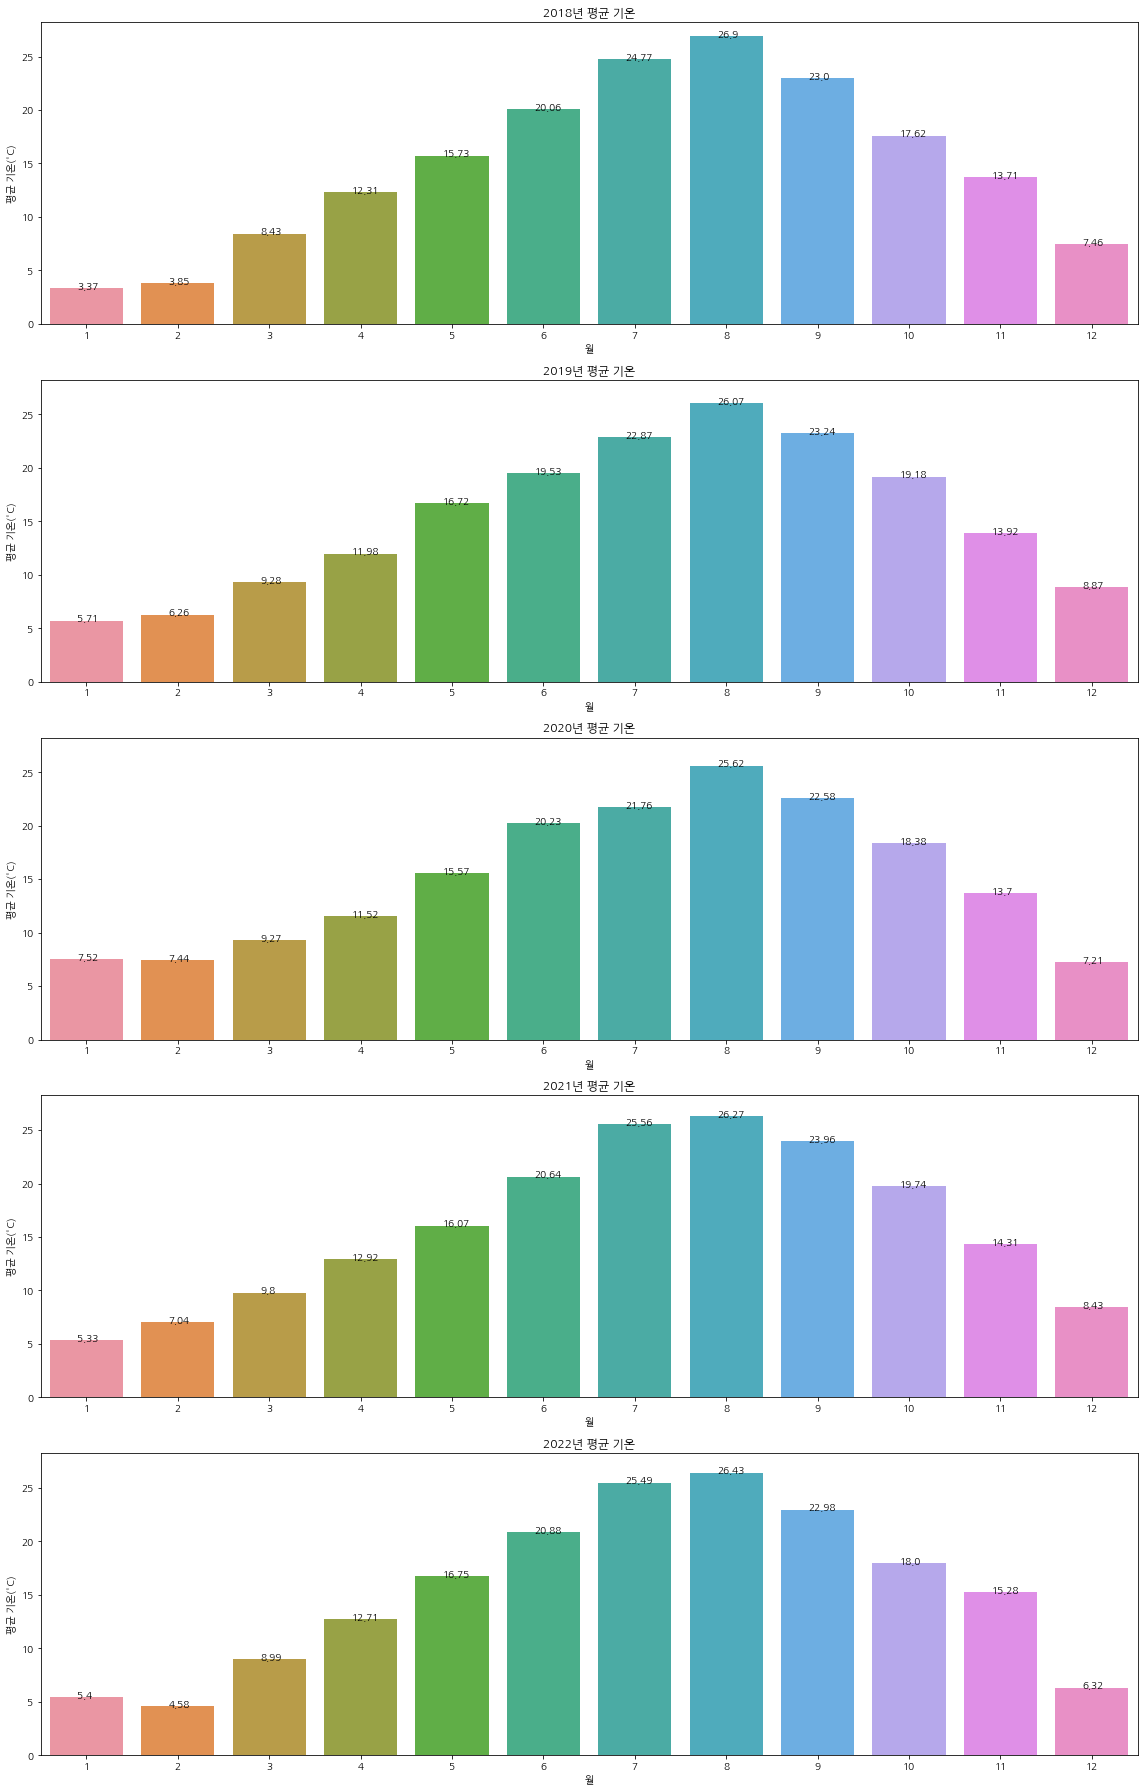

In [33]:
sub_df = df[df['평균 기온(°C)']>-273].groupby(['년도','월'],as_index=False)['평균 기온(°C)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 기온(°C)',ax=axes[i]).set(title=f'{y}년 평균 기온')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 기온(°C)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

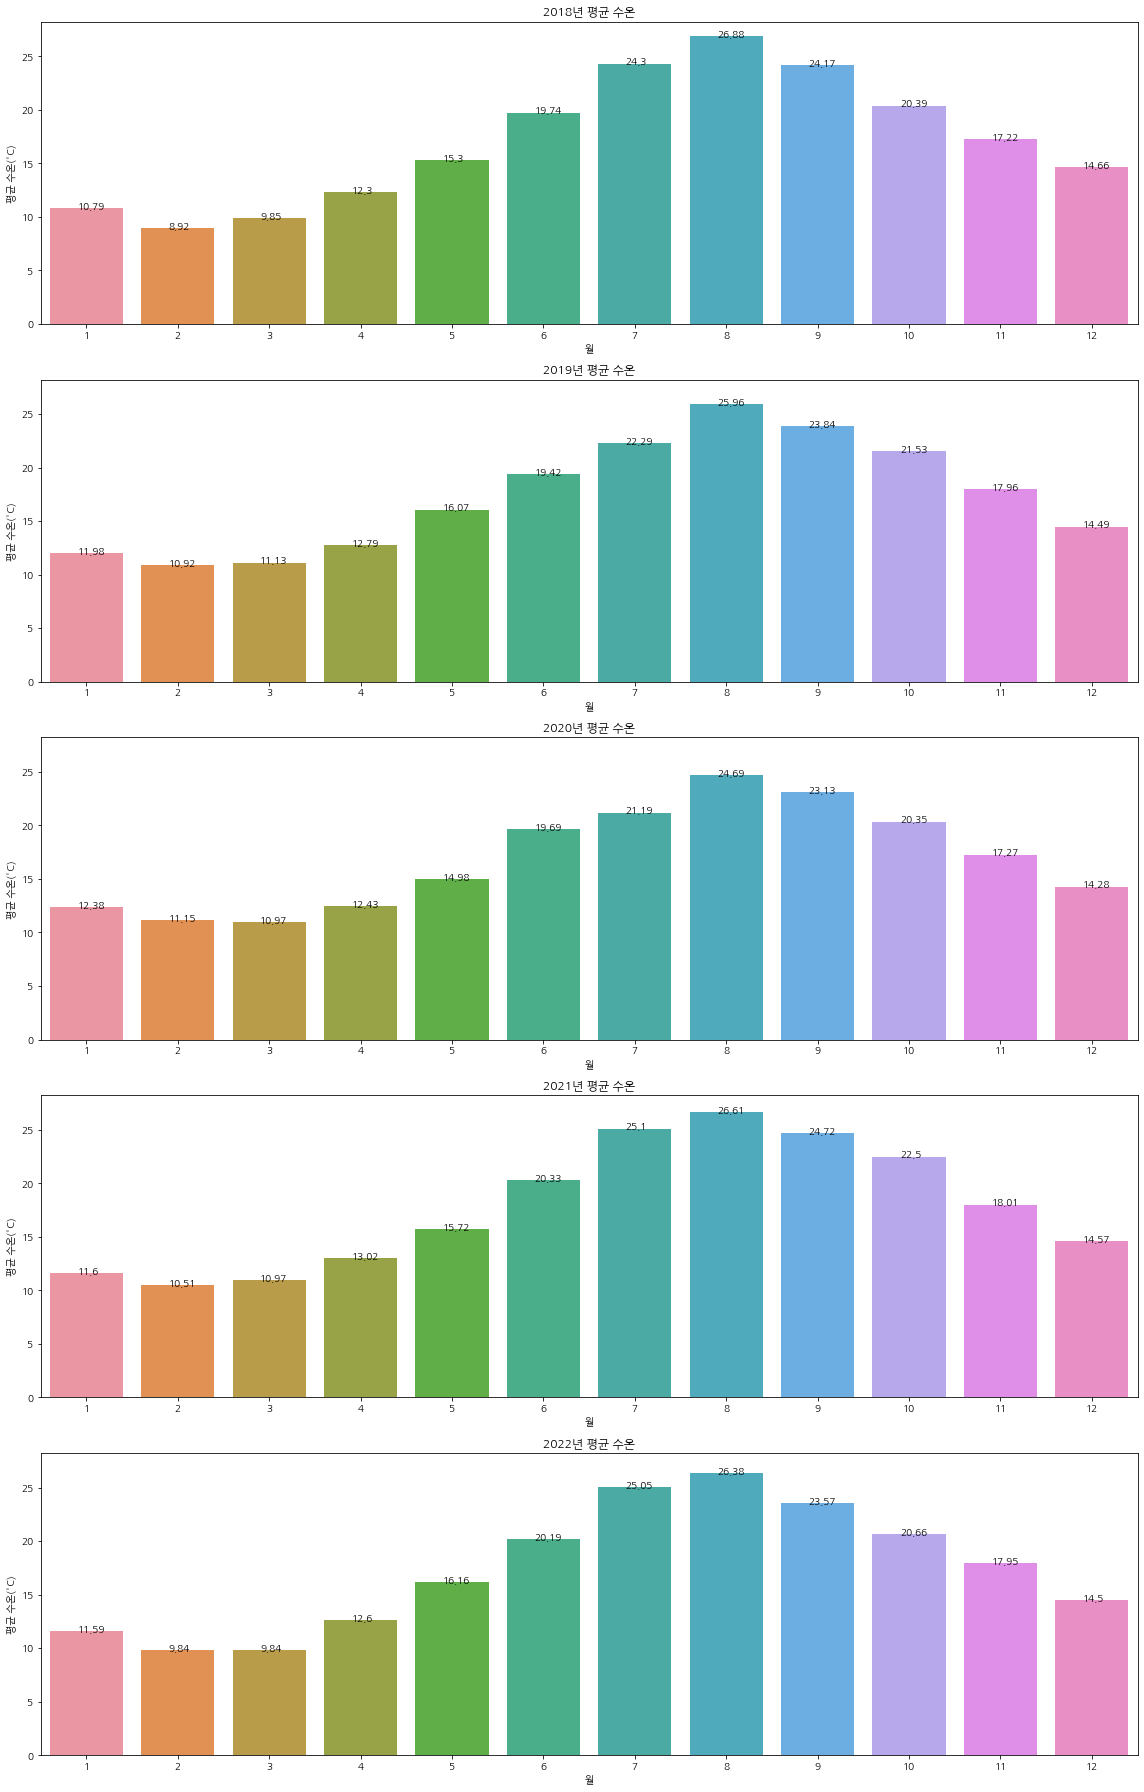

In [34]:
sub_df = df[df['평균 수온(°C)']>-1].groupby(['년도','월'],as_index=False)['평균 수온(°C)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 수온(°C)',ax=axes[i]).set(title=f'{y}년 평균 수온')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 수온(°C)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

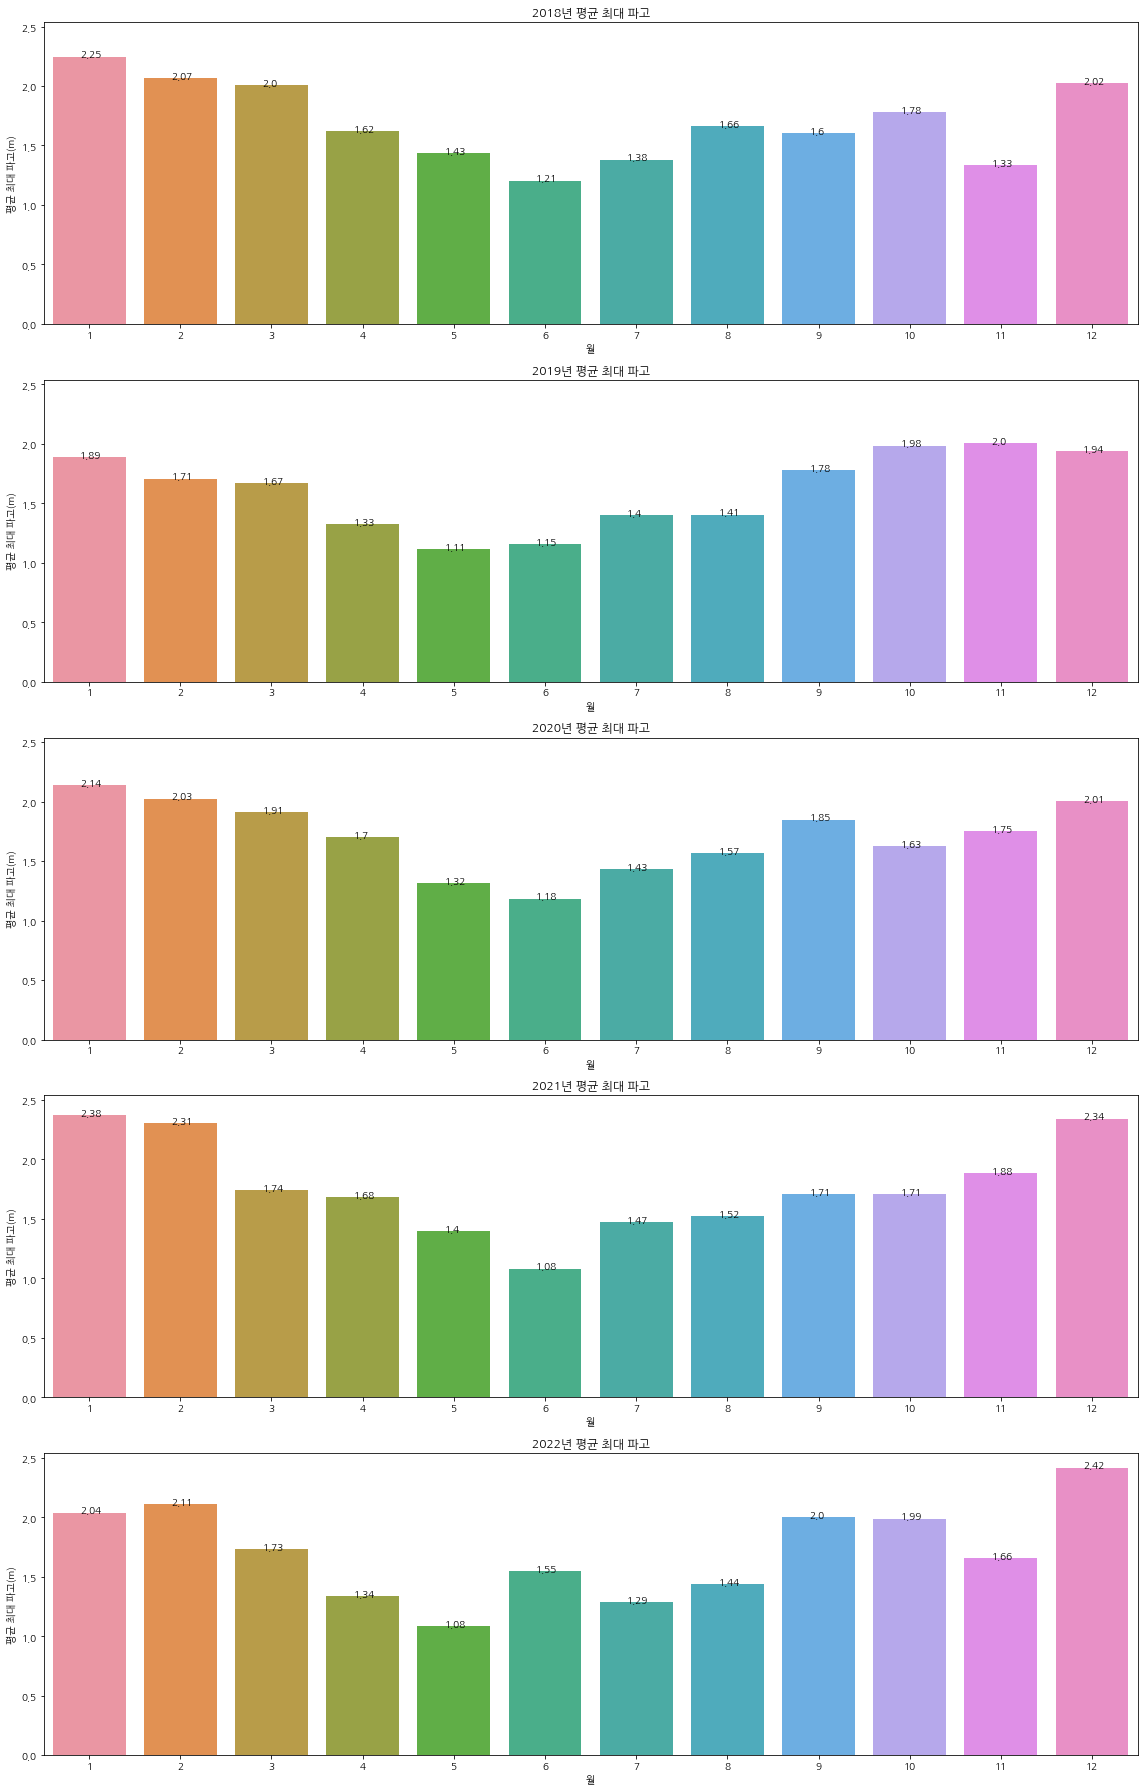

In [35]:
sub_df = df[df['평균 최대 파고(m)']>-1].groupby(['년도','월'],as_index=False)['평균 최대 파고(m)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 최대 파고(m)',ax=axes[i]).set(title=f'{y}년 평균 최대 파고')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 최대 파고(m)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

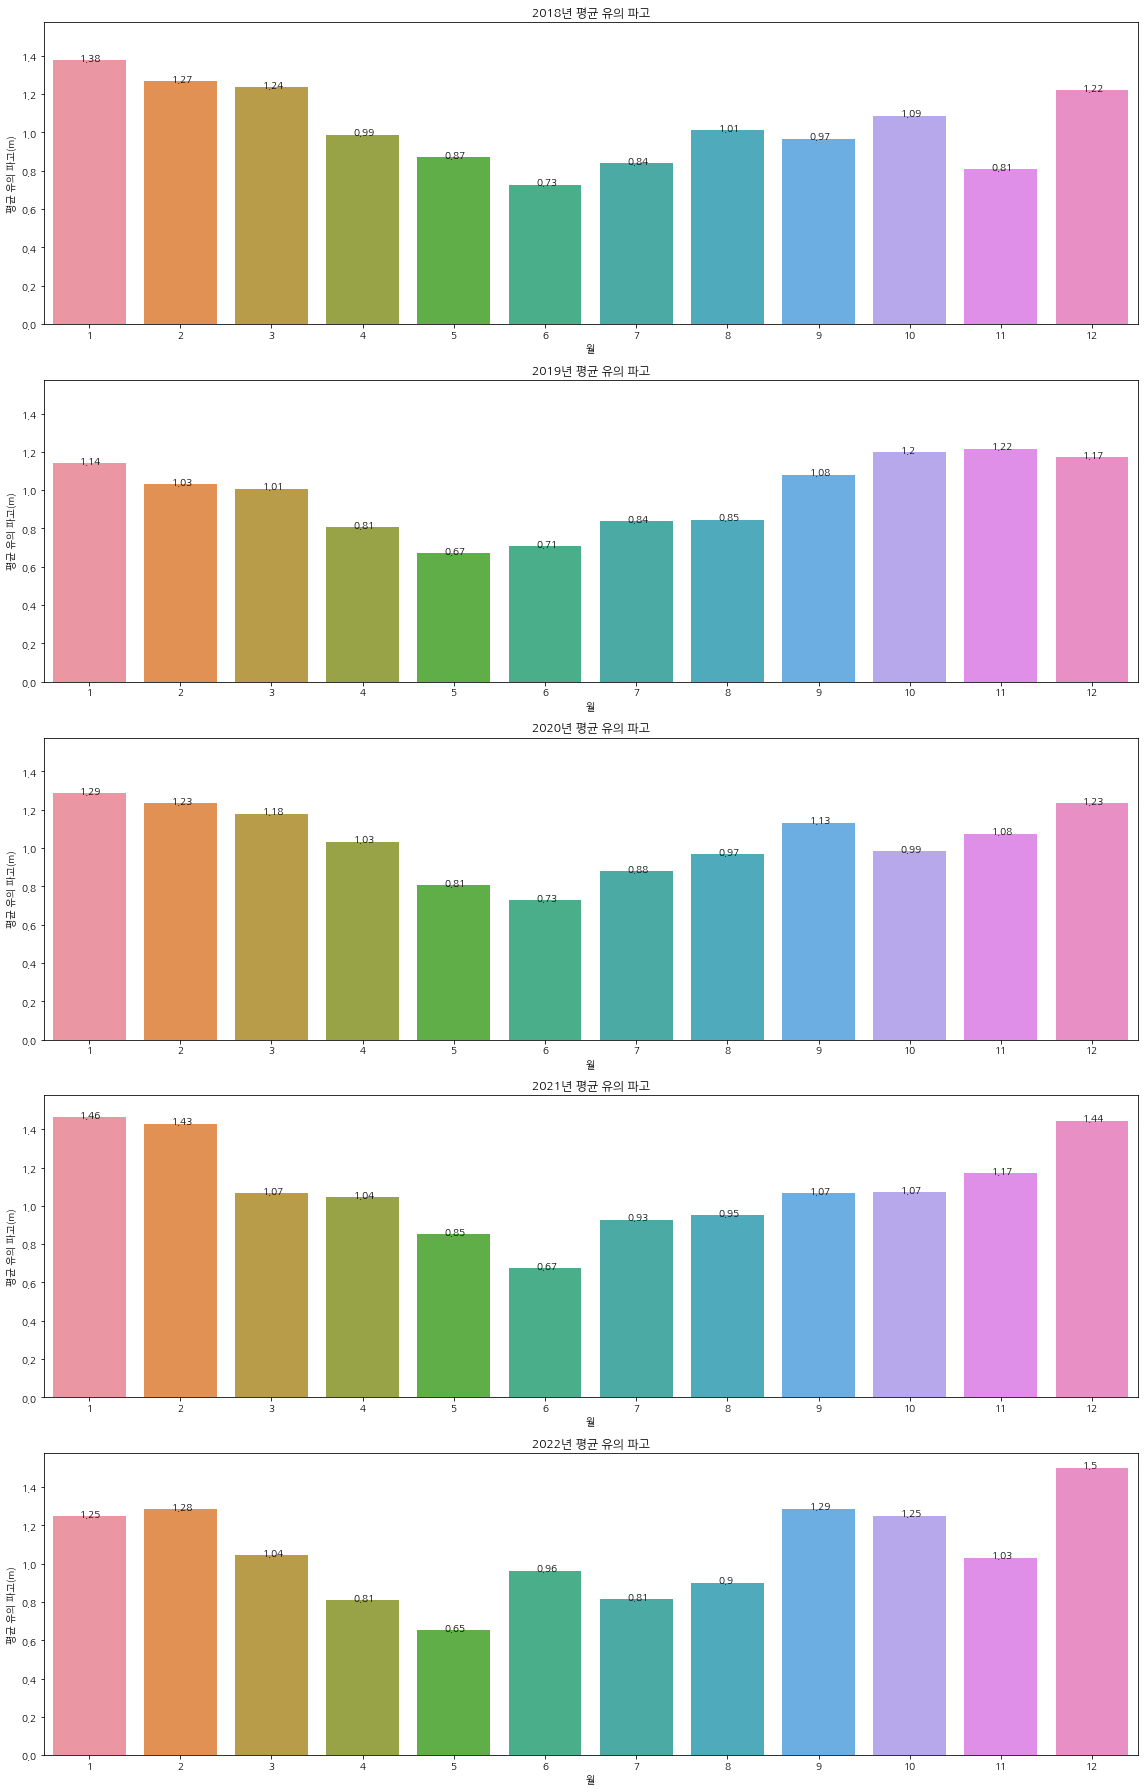

In [36]:
sub_df = df[df['평균 유의 파고(m)']>-1].groupby(['년도','월'],as_index=False)['평균 유의 파고(m)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 유의 파고(m)',ax=axes[i]).set(title=f'{y}년 평균 유의 파고')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 유의 파고(m)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

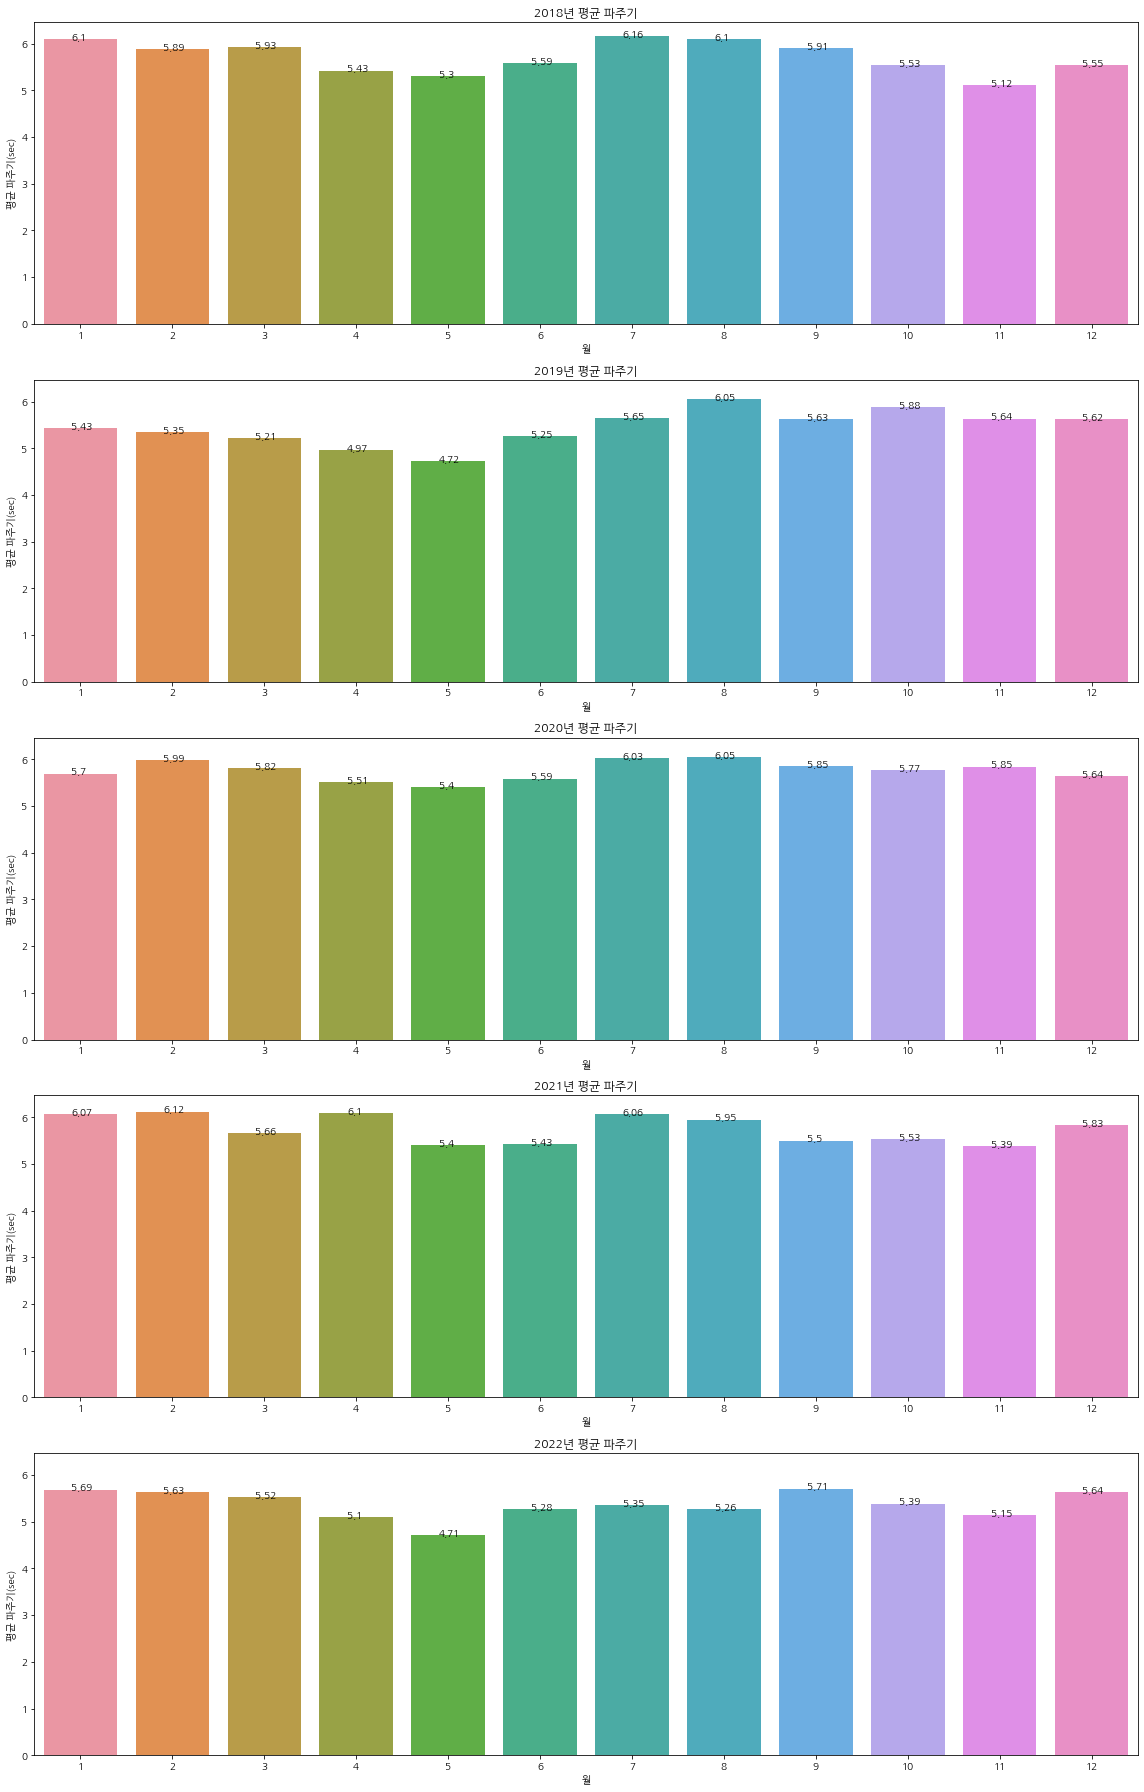

In [37]:
sub_df = df[df['평균 파주기(sec)']>-1].groupby(['년도','월'],as_index=False)['평균 파주기(sec)'].mean()
fig,axes = plt.subplots(5,1,figsize=(16,25),sharey=True)
y_list = df['년도'].unique()
for i,y in enumerate(y_list):
    sns.barplot(data=sub_df[sub_df['년도']==y],x='월',y='평균 파주기(sec)',ax=axes[i]).set(title=f'{y}년 평균 파주기')
    for j in range(12):
        h = axes[i].patches[j].get_height()
        x = axes[i].patches[j].get_x()
        v = sub_df[sub_df['년도']==y]['평균 파주기(sec)'].values[j]
        axes[i].annotate(str(round(v,2)),(x*1+0.3, h))
plt.tight_layout()

<AxesSubplot: >

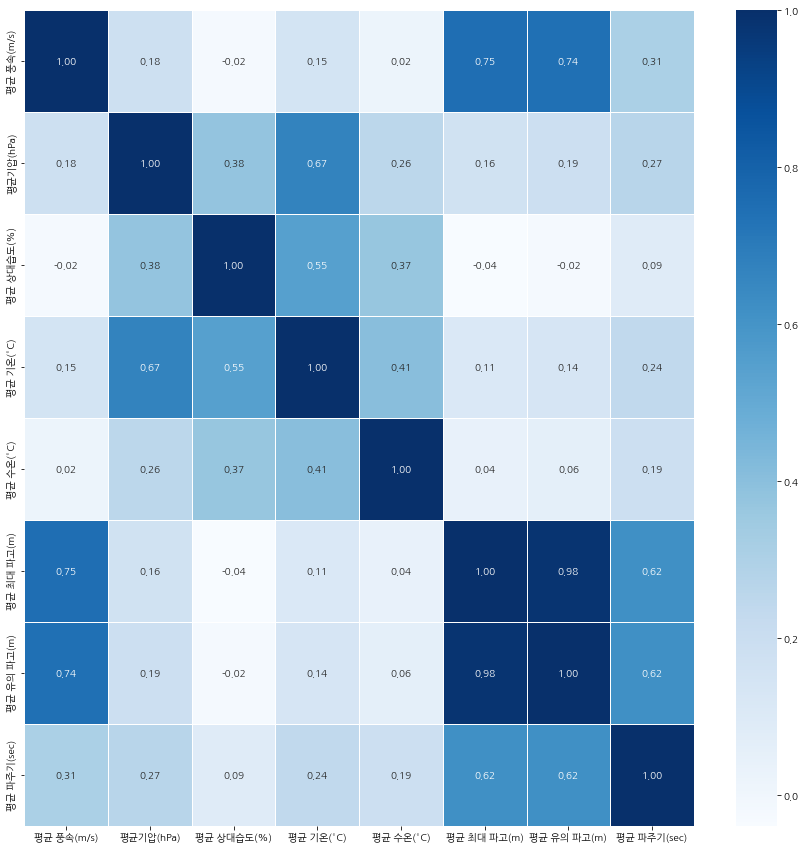

In [38]:
plt.figure(figsize=(15,15))
corr_cols = ['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']
sns.heatmap(data = df[corr_cols].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

- 기온과 기압, 풍속과 파고, 파주기와 파고가 높은 상관관계를 보인다.